<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:100px">
<center>
    <h1> Laboratorio 3 Estadística Computacional </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
</center>
<p>
<center><h4>Julio 2018</h4></center>
</p>

#### Integrantes:

*Benjamín Jorquera 201473521-9 Malla Nueva*

Se importaran las siguientes librerías para el desarrollo del presente notebook:

In [191]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
import statsmodels.api as sm
from scipy import special
from scipy.stats import poisson
from scipy import stats
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

### Pregunta 1: Ley de los Grandes Números.

1) Calcule la probabilidad teórica de que k = 80, 100, 120 clientes frecuenten la tienda.

Solución: Sea X una variable aleatoria discreta que indica la cantidad de clientes que frecuentan la tienda durante el día, se tiene que:

$$X \sim Poi(λ = 100)$$

Donde la función de probabilidad de la distribución de Poisson está dada por:

$$f(x)= \left\{ \begin{array}{lc}
             \frac{\exp^{-\lambda} \lambda ^{x}}{x!} & x = 0,1,2,... \\
             \\ 0 & etoc \\
             \end{array}
   \right.$$
   
La cual será evaluada en *x = {80,100,120}*:

In [60]:
for i in range(80,121,20):
    print((math.exp(-100)*100**i)/math.factorial(i)) #f.d.p distribución de Poisson

0.00519785412598018
0.039860996809147134
0.005561064886513001


Así las probabilidades teóricas de que 80, 100 y 120 clientes frecuenten la tienda por día son:

$$P(X = 80) \approx 0.0052%$$
$$P(X = 100) \approx0.0399%$$
$$P(X = 120) \approx0.0056%$$

2) Genere 4 muestras de dicha distribución de Poisson con tamaños n = 5, 100, 5000 y 10000.

Solución: El método poisson.rvs($\lambda$, size=n) genera una lista de valores aleatorios de la distribución de Poisson, con parámetros $\lambda$ = 100 y *n = {5, 100, 5000, 10000}* el tamaño de la muestra. Las listas son almacenadas en un diccionario para un manejo más fácil de estos, donde la primera muestra queda:

In [69]:
muestras = { 1: poisson.rvs(100, size=5), 2: poisson.rvs(100, size=100), 3: poisson.rvs(100, size=5000), 4: poisson.rvs(100, size=10000)}
print(muestras[1])

[ 96  92 108 109  98]


3) Para cada muestra generada determinar la probabilidad empírica de que k = 80, 100, 120 clientes frecuenten la tienda. Explique las discrepancias obtenidas en el inciso número 1.

Solución: Por cada lista se crea un diccionario que contiene las ocurrencias de cada valor en las muestras, luego son consultados los valores buscados *x = {80, 100, 120}* que corresponden a los clientes que frecuentan la tienda para dividirlos por el largo n de la lista que los contiene:

In [70]:
for i in muestras:
    arreglo = muestras[i] 
    prob = [0,0,0] #Lista vacía para imprimir las probabilidades
    dic = dict(zip(*np.unique(arreglo, return_counts=True))) #Diccionario de ocurrencias
    
    #Chequeo de valores y cálculo de la media
    if 80 in dic: prob[0] = dic[80]/len(arreglo) 
    else: prob[0] = 0.0
    if 100 in dic: prob[1] = dic[100]/len(arreglo)
    else: prob[1] = 0.0
    if 120 in dic: prob[2] = dic[120]/len(arreglo)
    else: prob[2] = 0.0
        
    print("Caso",i,":",prob)

Caso 1 : [0.0, 0.0, 0.0]
Caso 2 : [0.02, 0.04, 0.0]
Caso 3 : [0.0048, 0.0416, 0.0044]
Caso 4 : [0.0054, 0.0371, 0.0069]


Por lo tanto las probabilidades experimentales de que 80, 100 y 120 clientes frecuenten la tienda son, respectivamente: 0%, 0%, 0% en la muestra de largo 5; 0.02%, 0.04%, 0% en la muestra de largo 100; 0.0048%, 0.0416%, 0.0044% en la muestra de largo 5000 y 0.0054%, 0.0371%, 0.0069% en la muestra de largo 10000. Se puede apreciar a priori que mientras más grande es la muestra más cercana es la probabilidad empírica a la probabilidad teórica, es decir, se cumple la Ley de los Grandes Números con la distribución utilizada para modelar el fenómeno de los clientes que entran a la tienda, tendiendo a que sea más probable que la frecuenten 100 clientes por día, el cual coincide con el parámetro $\lambda$ de la distribución. Cabe destacar también que la distribución de Poisson se denomina Ley de los eventos raros, es decir, la distribucón puede tomar cualquier valor cercano a $\lambda$, por ello las probabilidades de cierto evento en particular son tan bajas.

4) Genere 4 muestras de tamaño 1000 cada una donde cada elemento de dicha muestra es la media de una distribución de Poisson de tamaño n = 5, 100, 5000, 10000. Cada una con $\lambda$ = 100.

Solución: Primero se vacía el diccionario de muestras y se inicializan 4 listas de tamaño 1000 cada una, luego cada posición de este guarda la media de una distribución de Poisson con parámetros $\lambda$ = 100 y los valores previos de tamaños muestrales.

In [188]:
muestras = { 1: [0] * 1000 , 2: [0] * 1000, 3: [0] * 1000, 4: [0] * 1000}

for i in range(1000):
    muestras[1][i] = np.mean(poisson.rvs(100, size=5)) #Se guarda el promedio de las distribuciones aleatorias de Poisson(λ=100) de tamaño n
    muestras[2][i] = np.mean(poisson.rvs(100, size=100))
    muestras[3][i] = np.mean(poisson.rvs(100, size=5000))
    muestras[4][i] = np.mean(poisson.rvs(100, size=10000))

5) ¿Cuál debería ser la media teórica de todas estas distribuciones?

Solución: Sea $Y_i$ con *i = {1,2,3,4}* las nuevas muestras de tamaño *k = 1000* generadas a partir del promedio de las distribuciones de Poisson con $\lambda$ = 100 y tamaños n = {5, 100, 5000, 10000}. Por cada lista se calcula la sumatoria de sus valores y el total se divide por el largo k.

In [32]:
for i in muestras:
    suma = 0
    for j in muestras[i]: #Se suman los valores de cada muestra
        suma += j
    print("Caso",i,":",suma / len(muestras[i]))

Caso 1 : 99.69260000000017
Caso 2 : 99.95946999999997
Caso 3 : 99.9921151999998
Caso 4 : 100.00566309999991


Entonces se tiene que:

$$\bar{Y_i} = \frac{1}{k} \sum_{j=1}^{k}y_j$$

Teóricamente hablando las medias de las nuevas muestras de tamaño 1000 (generadas a partir del promedio de las distribuciones de Poisson con $\lambda$ = 100) deberían ser cercanas a $\lambda$ clientes/día:

$$\bar{Y_1} \approx 99.7, \bar{Y_2} \approx 99.96, \bar{Y_3} \approx 99.99, \bar{Y_4} \approx 100.00$$ 

En efecto las distribuciones de mayor tamaño convergen mejor a este valor debido a la Ley de los Grandes Números.

6) Para cada muestra generada en el inciso 4 haga un scatterplot, compare los scatterplot y concluya a partir de lo que ve.

Solución: Por cada muestra de largo *k = 1000* se realiza un conteo de valores que son guardados en un diccionario de ocurrencias de la forma {llave: valor}, donde las *llaves* son los valores y el *valor* las ocurrencias dentro de su respectiva muestra. Estas variables son asignadas a los ejes $x$ e $y$ (en forma de lista) para graficar los Scatter Plot:

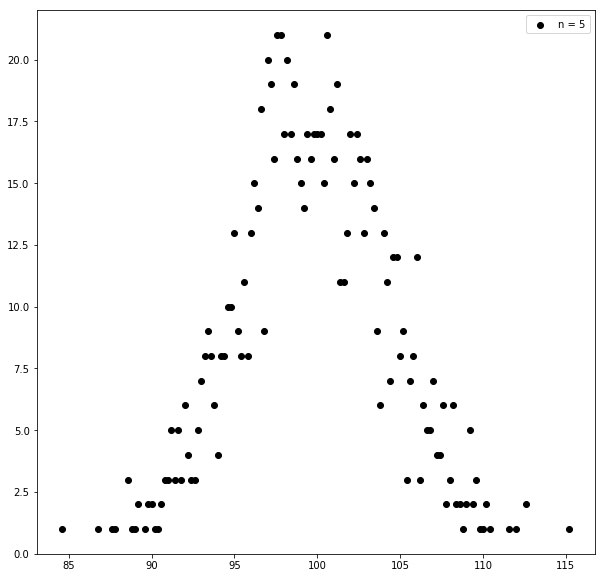

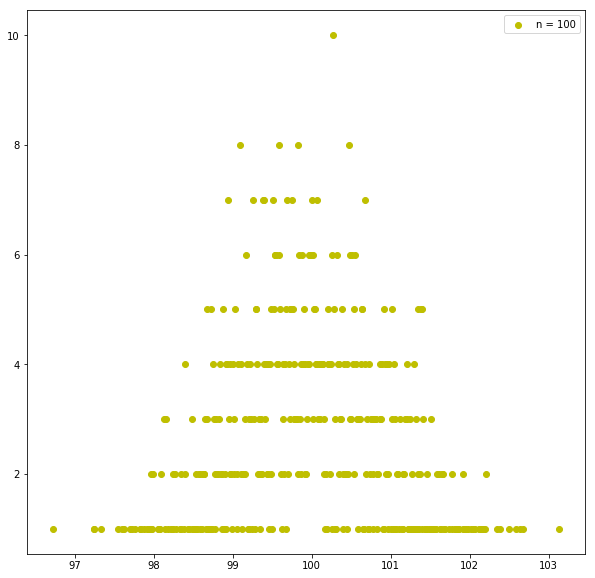

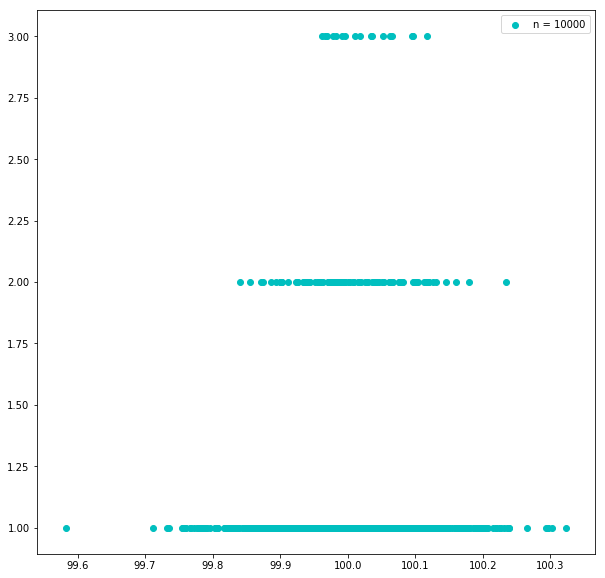

In [111]:
colors = list("rgbcmyk")

#Diccionario de ocurrencias
counter = dict(zip(*np.unique(muestras[1], return_counts=True)))

#Definición de los ejes
x = counter.keys()
y = counter.values()

#Configuración del gráfico
plt.figure(figsize=(10,10))
plt.scatter(x,y,color=colors.pop(),label='n = 5')
plt.legend()
plt.show()

counter = dict(zip(*np.unique(muestras[2], return_counts=True)))
x = counter.keys()
y = counter.values()
plt.figure(figsize=(10,10))
plt.scatter(x,y,color=colors.pop(), label='n = 100')
plt.legend()
plt.show()

counter = dict(zip(*np.unique(muestras[3], return_counts=True)))
x = counter.keys()
y = counter.values()
plt.figure(figsize=(10,10))
plt.scatter(x,y,color=colors.pop(), label='n = 5000')
plt.legend()
plt.show()

counter = dict(zip(*np.unique(muestras[4], return_counts=True)))
x = counter.keys()
y = counter.values()
plt.figure(figsize=(10,10))
plt.scatter(x,y,color=colors.pop(), label='n = 10000')
plt.legend()
plt.show()

De estos gráficos podemos comparar el grado de dispersión de las muestras, en donde el promedio de las distribuciones de números aleatorios varían respecto a la cantidad generada. Para la primera muestra de distribución Poisson($\lambda = 100$) de tamaño *n = 5* vemos como la media se dispersa entre $80 < x < 120$, mientras que las cantidades varían entre $0 < y < 25$ aproximadamente. En contraste, al promediarse las muestras de mayor tamaño la dispersión de los datos tiende a ser menor, así las muestras de *n = 10000* convergen a valores mas cercanos a $\lambda$ = 100 y en cantidades más pequeñas, de esta manera se agudiza el comportamiento de la distribución.

7) Haga un boxplot de cada muestra generada en el inciso 4. ¿Le hace sentido lo que observa con lo que respondió en el inciso 6? Recuerde explayar su respuesta.

Solución: A partir de las listas en el diccionario de muestras se crean 2 dataframes para graficar los boxplot:

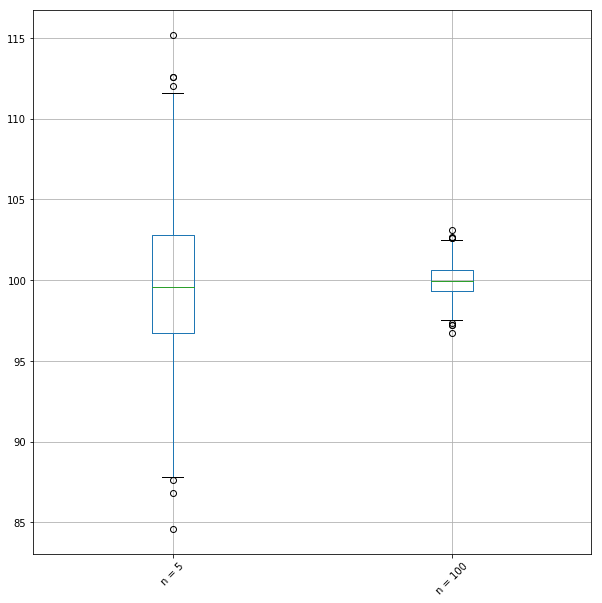

In [115]:
#Data frames de las muestras separadas en dos grupos.
df = pd.DataFrame([('n = 5', muestras[1]), ('n = 100', muestras[2])], columns=['Tamaño', 'Muestra']).set_index('Tamaño')
df_2 = pd.DataFrame([('n = 5000', muestras[3]), ('n = 10000', muestras[4])], columns=['Tamaño', 'Muestra']).set_index('Tamaño')

#Gráfico de BoxPlot
df['Muestra'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(10,10),rot=45)
plt.show()
df_2['Muestra'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(10,10),rot=45)
plt.show()

Con el fin de apreciar los datos en cada boxplot estos se separaron en 2 grupos, el primer grupo tiende a ser más disperso por lo mucho que varia el promedio de la distribución de Poisson de menor tamaño, mientras que el segundo grupo tiene valores más cercanos a $\lambda = 100$ como se esperaba, además en el tercer y cuarto boxplot se observa que el 50% de los datos converge a este valor, confirmando así las conclusiones realizadas en el item anterior.

### Pregunta 2: Teorema de la Función Inversa.

1) Identificar la función que defina a la variable aleatoria.

Solución: Sea la variable aleatoria continua X : $\Omega \rightarrow \mathbb{R}$ que sigue una distribución de Weibull con parámetros $\alpha > 0$ y $\beta > 0$ definida por la función de densidad de probabilidad:

$$f(x)= \left\{ \begin{array}{lcc}
             0 & si & x < 0 \\
             \\ \frac{\alpha}{\beta^{\alpha}}x^{\alpha-1}\exp (-(\frac{x}{\beta })^{\alpha}) & si & x \geq 0 \\
             \end{array}
   \right.$$
   
Se denota como $X \sim Weibull(\alpha,\beta)$

2) De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).

Solución: Para obtener la función de densidad acumulada debemos integrar la función de probabilidad para los valores de x donde la función es continua, esto es $\forall x \geq 0$:

$$\int_{0}^{x} \frac{\alpha}{\beta^{\alpha}}t^{\alpha-1}\exp (-(\frac{t}{\beta })^{\alpha})dt = 1 - \exp(-(\frac{x}{\beta})^{\alpha})$$

Obteniendo así $F(x) = P(X \leq x)$. Ahora para saber si es invertible debemos considerar lo siguiente: si una variable aleatoria X tiene una función de distribución $F(x)$ que admite inversa, entonces se verifica que la variable transformada $U = F(x)$ sigue siempre una distribución uniforme continua $U$. Este resultado se aplica en la vida real considerando la igualdad $u = F(x)$ y despejando x en función de $u$, que vendrá dado por:

$$x = F^{-1}(u)$$

Con lo que si se genera $u \sim U(0,1)$ se tiene que $x = F^{-1}(u)$ sigue una distribución de X.

3) De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$

Solución: Mediante el metodo de la inversa, consideramos $u = F(x)$ y despejamos x:

$$1 - \exp(-(\frac{x}{\beta})^{\alpha}) = u$$
$$\exp(-(\frac{x}{\beta})^{\alpha}) = 1 - u$$
$$(\frac{x}{\beta})^{\alpha} = -ln(1 - u)$$
$$\frac{x}{\beta} = [-ln(1 - u)]^{\frac{1}{\alpha}}$$
$$x = \beta[-ln(1 - u)]^{\frac{1}{\alpha}}$$

La cual generando $u \sim U(0,1)$ y aplicando la transformación $x = \beta[-ln(1 - u)]^{\frac{1}{\alpha}}$, obtendremos variables aleatorias Weibull.

Ahora reemplazamos los parámetros de la distribución por $\alpha$ = 10 y $\beta$ = 3:

$$x = 3[-ln(1 - u)]^{\frac{1}{10}}$$

4) Generar variables aleatorias sustituyendo valores con números aleatorios en la función acumulada inversa. Recuerde que estos números siguen la distribución $u \sim U(0,1)$.

Solución: Generamos unos cuantos valores aleatorios de distribución Uniforme $U(0,1)$ y los reemplazamos en x para obtener valores de distribución Weibull($\alpha = 10, \beta = 3$):

In [9]:
def inverseWeibull(x): #Función inversa
    return 3 * (-(math.log(1-x)))**(1/10)

u = np.random.uniform(0,1,5) #Lista de tamaño 5 con distribucion Uniforme Estándar

for i in range(5):
    print(inverseWeibull(u[i])) #Evaluación de la función

2.5146811155190707
2.6996767160958104
3.386533447839846
2.9826992530392737
3.030848993521735


5) Genere 10000 valores de $u$ y haga un gráfico de la densidad de dichos valores.

Solución: El gráfico de la lista de valores aleatorios generados por una disribución Uniforme Estándar es de la forma:

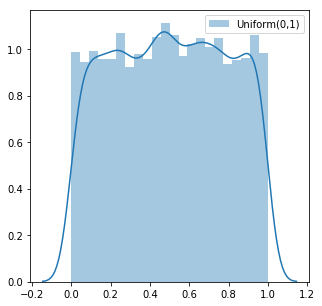

In [205]:
s = np.random.uniform(0,1,10000) #Lista de tamaño 10000 con distribucion Uniforme Estándar
plt.figure(figsize=(5,5)) #Tamaño de la figura
sns.distplot(s, label="Uniform(0,1)") #Método para graficar la muestra
plt.legend()
plt.show()

6) Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores.

Solución: El método numpy.random.weibull($\alpha$, size) genera una lista aleatoria definida por la distribución, pero su función es calculada usando solo el parámetro $\alpha$ de la forma:

$$X = (-ln(U))^{\frac{1}{\alpha}}$$

con $U(0,1)$. Así que definiremos una nueva función donde los valores de la distribución serán multiplicados por el paŕametro $\beta = 3$, dónde el resultado es el mismo que al aplicar la función inversa de ésta, a continuación gráficamos la lista generada:

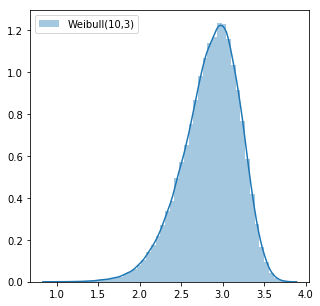

In [206]:
def weibull(alpha, beta, size): 
    s = np.random.weibull(alpha, size) #Lista de tamaño 100000 con distribución Weibull
    for i in range(len(s)): #Recorrido de la lista
        s[i] = beta*s[i]
    return s

plt.figure(figsize=(5,5))
sns.distplot(weibull(10, 3, 100000), label= "Weibull(10,3)")
plt.legend()
plt.show()

7) Concluya respecto a lo que observa en ambas gráficas.

Solución: Se puede observar cómo una distribución Uniforme Estándar se convierte en una distribución Weibull aplicando la inversa de a función de distribución, esto se aprecia mejor en los gráficos ya que desde los valores distribuidos uniformemente existe un acotamiento exponencial hacia ambos lados desde la media la cual converge al valor $\beta = 3$ (como se vió en el item 4 de esta sección) mientras que el parámetro $\alpha$ define la forma de la curva.

### Pregunta 3: Teorema del Límite Central.

Se tiene lo siguiente:

$$X_1 \sim Exp(0.1)$$
$$X_2 \sim Exp(0.5)$$
$$X_3 \sim Exp(0.2)$$
$$X_4 \sim Poi(1)$$
$$X_5 \sim Poi(20)$$
$$X_6 \sim Poi(50)$$
$$X_7 \sim N(10,5)$$
$$X_8 \sim N(20,30)$$
$$X_9 \sim N(40,50)$$
$$N = 100000$$

1) Si se suman todas las $X_i$ calcule la media teórica.

Solución: Para calcular la suma de todas las distribuciones se deberan generar las *p = 9* variables aleatorias, las cuales serán almacenadas en un diccionario, a continuación las p listas generadas con las muestras de cada población se concatenan en una lista $X_{n*p}$, la lista es ordenada y se calcula la sumatoria de los valores aleatorios generados por los métodos. Finalmente éste resultado se divide por el tamaño total de las muestras *n*p = 900000* siendo *n = 100000* el largo de cada distribución. El resultado corresponde también a la sumatoria de las medias $\bar{X}_{i}$ de cada población con *i = {1,2,..9}* dividido por cantidad de éstas:

In [51]:
X = {1: np.random.exponential(scale=0.1 , size=100000), 2: np.random.exponential(scale=0.5 , size=100000),
               3: np.random.exponential(scale=0.2 , size=100000), 4: np.random.poisson(lam=1 , size=100000),
               5: np.random.poisson(lam=20 , size=100000), 6: np.random.poisson(lam=50 , size=100000),
               7: np.random.normal(loc=10 , scale=5 , size=100000), 8: np.random.normal(loc=20 , scale=30 , size=100000),
               9: np.random.normal(loc=40 , scale=50, size=100000)} #Diccionario con las listas de las distribuciones

array = np.concatenate((X[1], X[2], X[3], X[4], X[5], X[6], X[7], X[8], X[9])) #Concatenación
array.sort()

#Cálculo de la media
media = 0
for i in range(900000):
    media += array[i]
media = media/900000

print(media, np.mean(array))

15.76320448114133 15.763204481141326


Por tanto se tiene que la media teórica es:

$$\bar{X}_{n*p} = \frac{1}{p}\sum_{j=1}^{p}\bar{X}_{j} \approx 15.77$$

2) Si se suman todas las $X_i$ calcule la varianza teórica.

Solución: Sea $\sigma^{2}_{n*p}$ la varianza de la suma de distribuciones, $\bar{X}_{n*p}$ la media y x los valores que la componen:

In [52]:
#Cálculo de la varianza
var = 0
for i in range(900000):
    var += (array[i] - media)**2 

var = var/900000
    
print(var, np.var(array))

698.1916513618095 698.191651362148


Se tiene que a varianza teórica es:

$$\sigma^{2}_{n*p} = \frac{1}{n*p}\sum_{j=1}^{n*p}(x_j - \bar{X}_{n*p})^2 \approx 698.2$$

3) ¿Si se suman todas las $X_i$ se cumple lo que dice el teorema del límite central?. ¿Los valores empíricos (media y varianza) concuerdan con lo esperado en el inciso 1 y 2 de esta sección?

Solución: Para que se cumpla el teorema de Límite Central se deberá calcular la sumatoria de los valores esperados E[$X_i$] y de las varianzas de cada distribución $\sigma^2_i$:

In [55]:
print((np.mean(X[1])+np.mean(X[2])+np.mean(X[3])+np.mean(X[4])+np.mean(X[5])+np.mean(X[6])+np.mean(X[7])+np.mean(X[8])+np.mean(X[9])))
print((np.var(X[1])+np.var(X[2])+np.var(X[3])+np.var(X[4])+np.var(X[5])+np.var(X[6])+np.var(X[7])+np.var(X[8])+np.var(X[9])))

141.86884033027192
3509.7935734796924


Por ende:

$$\mu_s = \sum_{i=1}^{p}E[X_i] \approx 141.87$$
$$\sigma^2_s = \sum_{i=1}^{p}\sigma^2_i \approx 3509.8$$

Los cuáles no corresponden a la media y varianza teórica calculadas previamente, ya que para que se cumpla el teorema del límite central la suma de las distribuciones debe resultar en una variable aleatoria la cuál debe tender a distribuirse siguiendo aproximadamente una distribución Normal (para n muy grande).

4) Exprese $X_s$ como una normal estándar. Explique el procedimiento.

Solución: Debemos estandarizar $X_s$ de la forma:

$$Z_s = \frac{X_s - \mu }{\sigma } = \frac{X_s - 141.87}{3509.8}$$

Para que la media de la nueva variable sea igual a 0 y la desviación estandar sea igual a 1. Así, las variables $Z_s$ convergeran en distribución a la distribución Normal Estándar $N(0,1)$, cuando s tienda a infinito. Como consecuencia, si $\Phi(z)$ es la función de distribución de $N(0,1)$, para cada número real z:

$$\lim_{s\rightarrow \infty}{P(Z_s \leq z)} = \Phi (z)$$

donde P( ) indica probabilidad.

### Pregunta 4: Estudio de Tiempos de Vida.

2) Utilizando las gráficas cuartil-cuartil determine que modelo se ajusta mejor a la muestra1.

Solución: En sentido descendente (a excepción de la primera) se encuentran las gráficas cuartil-cuartil de las distribuciones Weibull con parámetros:

$$\alpha = 40, \beta = 15$$
$$\alpha = 19, \beta = 9$$
$$\alpha = 10, \beta = 20$$
$$\alpha = 15, \beta = 40$$
$$\alpha = 30, \beta = 25$$
$$\alpha = 20, \beta = 10$$

QQPlot muestra 1


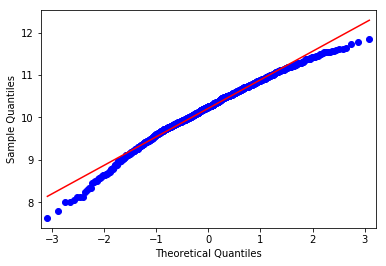

QQPlot Weibull(40,15)


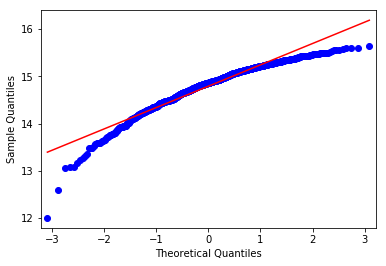

QQPlot Weibull(19,9)


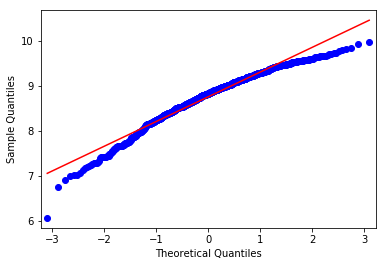

QQPlot Weibull(10,20)


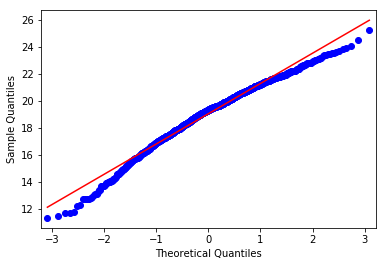

QQPlot Weibull(15,40)


QQPlot Weibull(30,25)


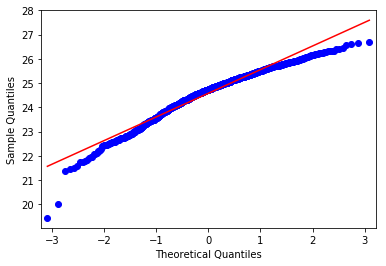

QQPlot Weibull(20,10)


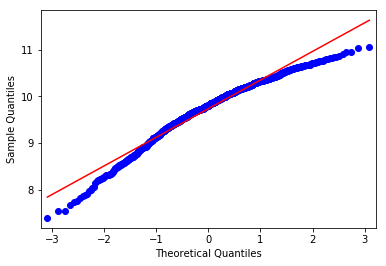

In [210]:
#Gráfico de la muestra
print("QQPlot muestra 1")
data_frame = pd.read_csv('muestra1.csv', sep=',') #Se crea el data frame
sm.qqplot(data_frame['valor'].values, line='s') #Se llama al método qqplot(lista, opciones)
pylab.show()

#Gráficos de las distribuciones
print("QQPlot Weibull(40,15)")
sm.qqplot(weibull(40,15,1000), line='s') #Se llama a la función weibull definida en la pregunta 3
pylab.show()

print("QQPlot Weibull(19,9)")
sm.qqplot(weibull(19,9,1000), line='s')
pylab.show()

print("QQPlot Weibull(10,20)")
sm.qqplot(weibull(10,20,1000), line='s')
pylab.show()

print("QQPlot Weibull(15,40)")
sm.qqplot(weibull(15,40,1000), line='s')
pylab.show()

print("QQPlot Weibull(30,25)")
sm.qqplot(weibull(30,25,1000), line='s')
pylab.show()

print("QQPlot Weibull(20,10)")
sm.qqplot(weibull(20,10,1000), line='s')
pylab.show()

Siendo Weibull(20, 10) el último de los gráficos el que mejor se ajusta a los datos de *muestra1.csv*.

### Pregunta 5: Verosimilitud.

2) Utilizar el método de Newton-Raphson para determinar el máximo verosímil de $\alpha$ para la distribución $Gamma(\alpha,\beta=1)$ para la distribución en "gamma.csv". Nota: considere $\alpha_0 = 0.2$ y $u = 0.0000001$

Solución: Considerando $\alpha_0 = 0.2$ guardamos este valor en una variable al igual que $u = 0.0000001$, luego creamos una variable *estimador* que representa el estimador máximo verosímil que debemos calcular:

In [212]:
data_frame = pd.read_csv('gamma.csv', sep=',')
gamma = data_frame['x'].values #Almacena los datos del data set gamma.csv

alpha_0 = 0.2
u = 0.0000001
estimador = 0

while(abs(estimador - alpha_0) >= u): #En caso de alcanzar la convergencia (condición del umbral)
    if (estimador != 0): alpha_0 = estimador #Evitamos que alpha sea igual a 0 la primera vez, luego alpha_0 toma el valor del estimador calculado
    sumatoria = 0
    for i in gamma:
        sumatoria += math.log(i) #Se calcula la sumatoria logaritmica de los valores de la distribución gamma
    log_1 = -len(gamma)*(special.digamma(alpha_0)) + sumatoria #Se calcula la primera derivada log-verosímil (con la ayuda del método special.digamma(valor))
    log_2 = -len(gamma)*(special.polygamma(1,alpha_0)) #Se calcula la segunda derivada log-verosímil (con special.polygamma(orden de la derivada, valor))
    estimador = alpha_0 - (log_1/log_2) #Se calcula el estimador

print(estimador, alpha_0)

2.6034921534206776 2.6034921532427644


Donde el estimador es $\alpha_{n+1} \approx 2.6034921534$ y cumple la siguiente condición:

$$\mid \alpha_{n+1} - \alpha_{n} \mid < u$$

con $\alpha_n \approx 2.6034921532$. Por lo tanto $\alpha_{n+1}$ es un estimador máximo verosímil. 